In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix

# baca data

In [ ]:
data=pd.read_csv('/content/diabetes_prediction_dataset.csv')
diabetes_data=pd.read_csv('/content/diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
27523,Female,28.0,0,0,No Info,40.10,6.0,90,0
27524,Male,31.0,0,0,current,19.81,6.2,155,0
27525,Male,14.0,0,0,never,27.32,6.5,130,0
27526,Male,53.0,0,0,never,29.40,6.6,155,0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               27528 non-null  object 
 1   age                  27528 non-null  float64
 2   hypertension         27528 non-null  int64  
 3   heart_disease        27528 non-null  int64  
 4   smoking_history      27528 non-null  object 
 5   bmi                  27528 non-null  float64
 6   HbA1c_level          27528 non-null  float64
 7   blood_glucose_level  27528 non-null  int64  
 8   diabetes             27528 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ MB
None


In [ ]:
print(data.describe())

                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  27528.000000  27528.000000   27528.000000  27528.000000  27528.000000   
mean      42.005618      0.077194       0.038797     27.369845      5.524415   
std       22.498018      0.266904       0.193114      6.682188      1.078814   
min        0.080000      0.000000       0.000000     10.010000      3.500000   
25%       24.000000      0.000000       0.000000     23.710000      4.800000   
50%       43.000000      0.000000       0.000000     27.320000      5.800000   
75%       60.000000      0.000000       0.000000     29.610000      6.200000   
max       80.000000      1.000000       1.000000     88.720000      9.000000   

       blood_glucose_level      diabetes  
count         27528.000000  27528.000000  
mean            138.018817      0.085731  
std              40.993501      0.279971  
min              80.000000      0.000000  
25%             100.000000      0.000000  
50%             140.0

In [ ]:
print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
for column in data.columns:
    unique_class = data[column].unique()
    print(f"Unique class in column '{column}': {unique_class}\n")

Unique class in column 'gender': ['Female' 'Male' 'Other']

Unique class in column 'age': [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]

Unique class in column 'hypertension': [0 1]

Unique class in column 'heart_disease': [1 0]

Unique class in column 'smoking_history': ['never' 'No Info' 'current' 'former' 'ever' 'not current']

Unique class in column 'bmi': [25.19 27.32 23.45 ... 44.72 54.89 41.35]

Unique class in column 'HbA1

# PREPROCESSING

In [ ]:
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['smoking_history'] = encoder.fit_transform(data['smoking_history'])

In [ ]:
for column in data.columns:
    kelas_unik = data[column].unique()
    print(f"Unique class in column '{column}': {kelas_unik}\n")

Unique class in column 'gender': [0 1 2]

Unique class in column 'age': [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]

Unique class in column 'hypertension': [0 1]

Unique class in column 'heart_disease': [1 0]

Unique class in column 'smoking_history': [4 0 1 3 2 5]

Unique class in column 'bmi': [25.19 27.32 23.45 ... 44.72 54.89 41.35]

Unique class in column 'HbA1c_level': [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7

In [ ]:
for column in data.columns:
    number_of_classes = data[column].value_counts()
    print(f"number of classes in the column '{column}': {number_of_classes}\n")

number of classes in the column 'gender': gender
0    16178
1    11345
2        5
Name: count, dtype: int64

number of classes in the column 'age': age
80.00    1541
51.00     480
48.00     452
47.00     438
55.00     431
         ... 
1.24       21
1.88       20
0.16       16
0.40       14
0.08        6
Name: count, Length: 102, dtype: int64

number of classes in the column 'hypertension': hypertension
0    25403
1     2125
Name: count, dtype: int64

number of classes in the column 'heart_disease': heart_disease
0    26460
1     1068
Name: count, dtype: int64

number of classes in the column 'smoking_history': smoking_history
4    9799
0    9723
3    2635
1    2540
5    1746
2    1085
Name: count, dtype: int64

number of classes in the column 'bmi': bmi
27.32    7031
27.80      35
25.00      35
25.15      34
24.96      31
         ... 
55.28       1
36.85       1
15.73       1
36.89       1
61.77       1
Name: count, Length: 3418, dtype: int64

number of classes in the column 'HbA1c_l

In [ ]:
print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               27528 non-null  int64  
 1   age                  27528 non-null  float64
 2   hypertension         27528 non-null  int64  
 3   heart_disease        27528 non-null  int64  
 4   smoking_history      27528 non-null  int64  
 5   bmi                  27528 non-null  float64
 6   HbA1c_level          27528 non-null  float64
 7   blood_glucose_level  27528 non-null  int64  
 8   diabetes             27528 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.9 MB
None


In [ ]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
27523,0,28.0,0,0,0,40.10,6.0,90,0
27524,1,31.0,0,0,1,19.81,6.2,155,0
27525,1,14.0,0,0,4,27.32,6.5,130,0
27526,1,53.0,0,0,4,29.40,6.6,155,0


# exploration

In [ ]:
sns.set(style="whitegrid")

<ipython-input-18-dda1d7d2abaf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='plasma')


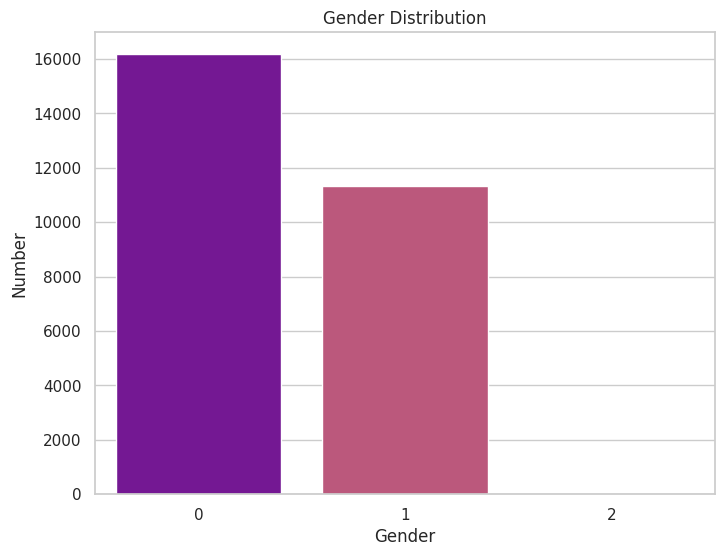

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data, palette='plasma')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number')
plt.show()

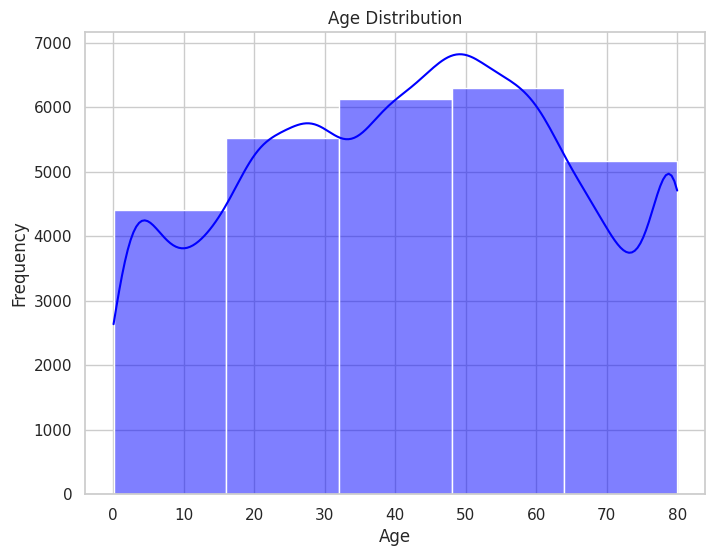

In [ ]:
# Plot histogram age distribution
plt.figure(figsize=(8, 6))  # Size figure (opsional)
sns.histplot(data['age'], bins=5, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Displaying plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


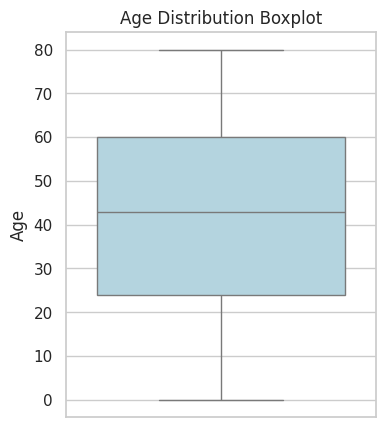

In [ ]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=data['age'], orient='h', color='lightblue')
plt.title('Age Distribution Boxplot')
plt.ylabel('Age')
plt.show()

<ipython-input-21-64636182414f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=data, palette='plasma')


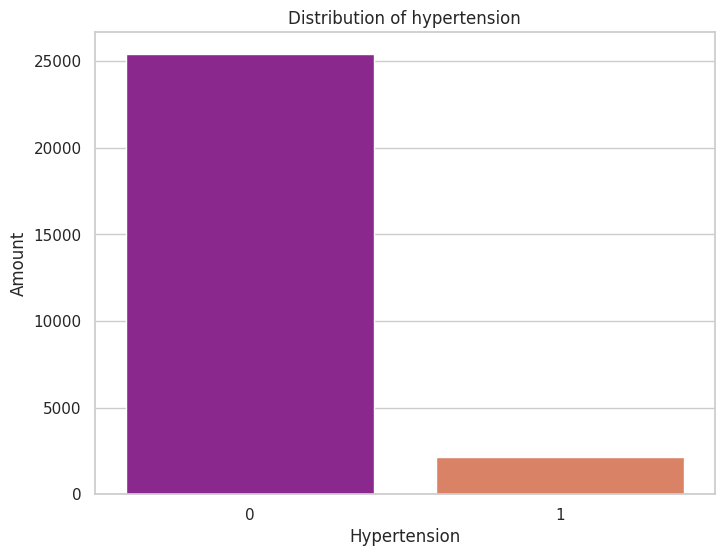

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', data=data, palette='plasma')
plt.title('Distribution of hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Amount')
plt.show()

<ipython-input-22-d8e15a11f8fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=data, palette='plasma')


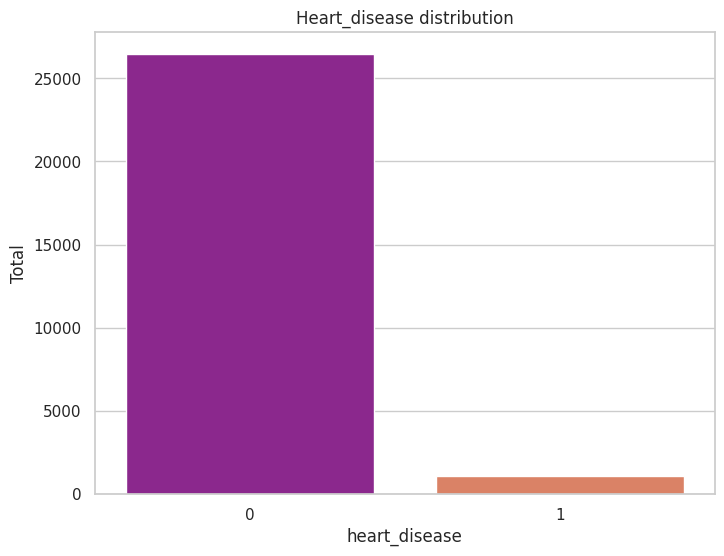

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', data=data, palette='plasma')
plt.title('Heart_disease distribution')
plt.xlabel('heart_disease')
plt.ylabel('Total')
plt.show()

<ipython-input-23-006f19dc26b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_history', data=data, palette='plasma')


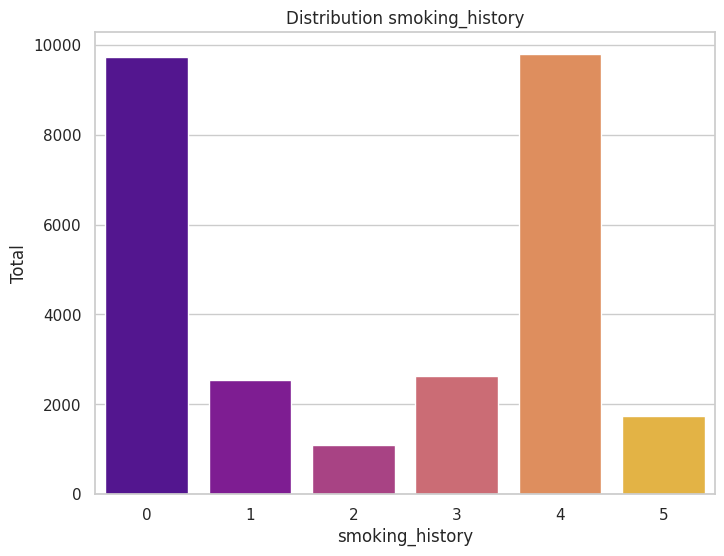

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_history', data=data, palette='plasma')
plt.title('Distribution smoking_history')
plt.xlabel('smoking_history')
plt.ylabel('Total')
plt.show()

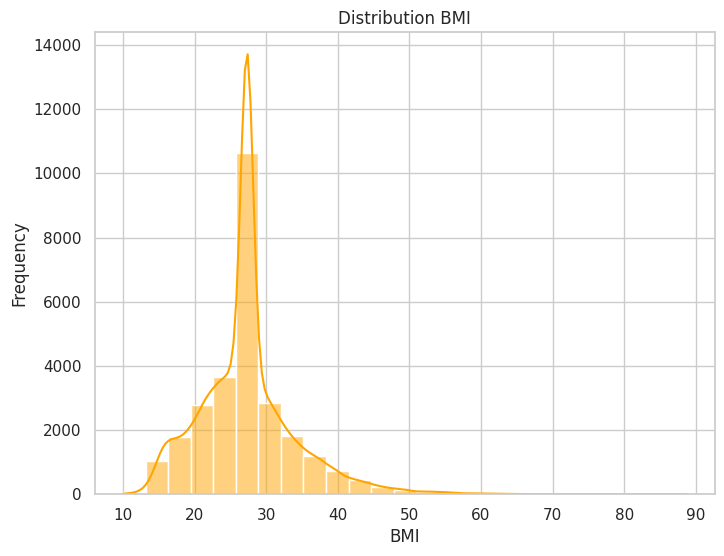

In [ ]:
# Plot histogram Distribution age
plt.figure(figsize=(8, 6))  #Size figure (optional)
sns.histplot(data['bmi'], bins=25, kde=True, color='orange')
plt.title('Distribution BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Displaying plot
plt.show()

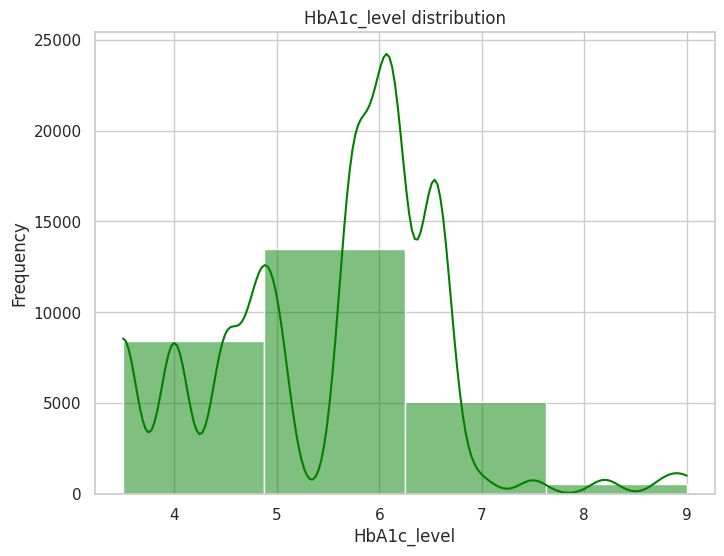

In [ ]:
# Plot histogram distribution usia
plt.figure(figsize=(8, 6))  # Size figure (optional)
sns.histplot(data['HbA1c_level'], bins=4, kde=True, color='green')
plt.title('HbA1c_level distribution')
plt.xlabel('HbA1c_level')
plt.ylabel('Frequency')

# Displaying plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


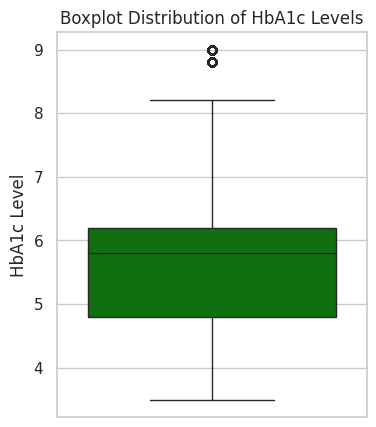

In [ ]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=data['HbA1c_level'], orient='h', color='green')
plt.title('Boxplot Distribution of HbA1c Levels')
plt.ylabel('HbA1c Level')
plt.show()

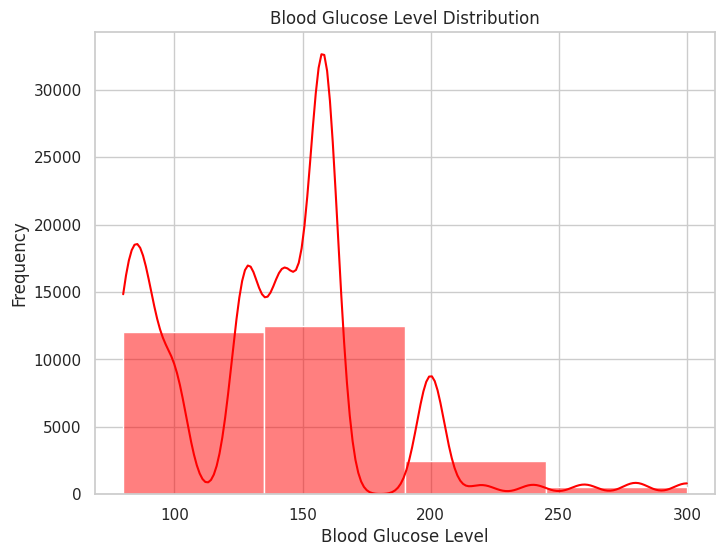

In [ ]:
# Plot histogram age distribution
plt.figure(figsize=(8, 6))  # Size figure (optional)
sns.histplot(data['blood_glucose_level'], bins=4, kde=True, color='red')
plt.title('Blood Glucose Level Distribution')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')

# Displaying plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


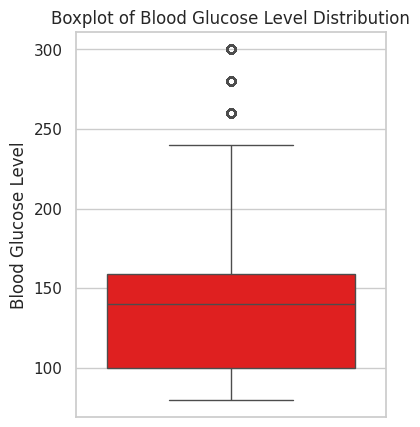

In [ ]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=data['blood_glucose_level'], orient='h', color='red')
plt.title('Boxplot of Blood Glucose Level Distribution')
plt.ylabel('Blood Glucose Level')
plt.show()

<ipython-input-29-7a852094965a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=data, palette='plasma')


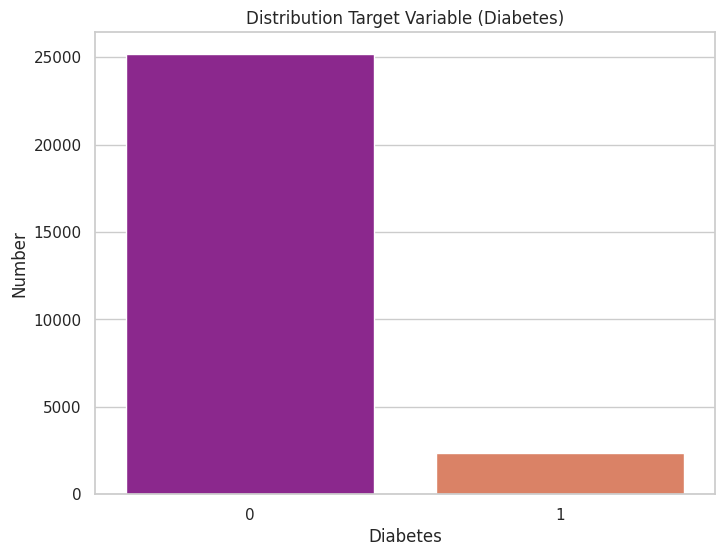

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=data, palette='plasma')
plt.title('Distribution Target Variable (Diabetes)')
plt.xlabel('Diabetes')
plt.ylabel('Number')
plt.show()

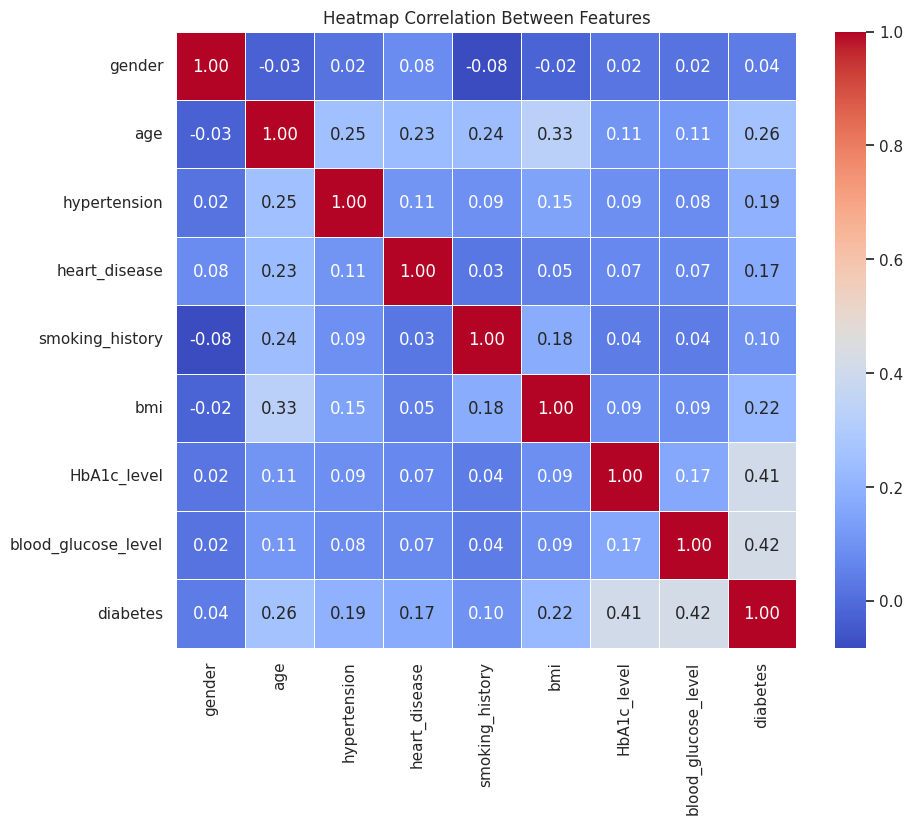

In [ ]:
# 2.3 Correlation Between Features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Correlation Between Features')
plt.show()

# model

#some of the codes below are not mine

In [ ]:
X=data.drop('diabetes',axis=1)
y=data['diabetes']

In [ ]:
scale=MinMaxScaler()
scale.fit(X)

MinMaxScaler()

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
clf_knn=KNeighborsClassifier()
parametrs_knn={'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean','manhattan','chebyshev']}
stratified_kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
grid_clf_knn = GridSearchCV(clf_knn, parametrs_knn, cv=stratified_kfold, n_jobs=-1)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [ ]:
best_model_knn=grid_clf_knn.best_estimator_
y_pred_knn=best_model_knn.predict(X_test)

In [ ]:
best_model_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [ ]:
print(f'Accuracy_score: {accuracy_score(y_test,y_pred_knn)}')
print(f'Precision_score: {precision_score(y_test,y_pred_knn)}')
print(f'Recall_score: {recall_score(y_test,y_pred_knn)}')
print(f'f1_score: {f1_score(y_test,y_pred_knn)}')

Accuracy_score: 0.9530659691950014
Precision_score: 0.940959409594096
Recall_score: 0.45373665480427045
f1_score: 0.6122448979591837


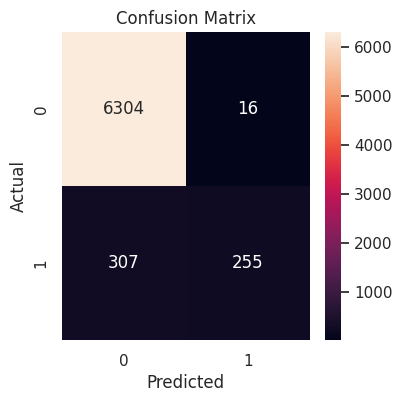

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(4, 4))
b = sns.heatmap(cf_matrix, annot=True, fmt='g')
b.set(title='Confusion Matrix')
b.set(xlabel='Predicted', ylabel='Actual')
plt.show()

In [ ]:
clf_rnf=RandomForestClassifier()
parametrs_rnf={'n_estimators':[3,5,7,10], 'max_depth':[2,3,4,5,6]}
stratified_kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
grid_forest = GridSearchCV(clf_rnf, parametrs_rnf, cv=stratified_kfold, n_jobs=-1)
grid_forest.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [3, 5, 7, 10]})

In [ ]:
best_model_rnf=grid_forest.best_estimator_
y_pred_rnf=best_model_rnf.predict(X_test)

In [ ]:
best_model_rnf

RandomForestClassifier(max_depth=5, n_estimators=10)

In [ ]:
print(f'Accuracy_score: {accuracy_score(y_test,y_pred_rnf)}')
print(f'Precision_score: {precision_score(y_test,y_pred_rnf)}')
print(f'Recall_score: {recall_score(y_test,y_pred_rnf)}')
print(f'f1_score: {f1_score(y_test,y_pred_rnf)}')

Accuracy_score: 0.972972972972973
Precision_score: 1.0
Recall_score: 0.6690391459074733
f1_score: 0.8017057569296374


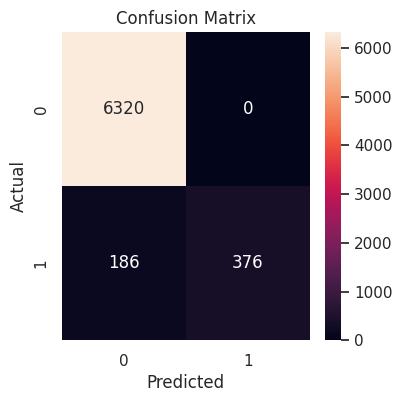

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_rnf)

plt.figure(figsize=(4, 4))
b = sns.heatmap(cf_matrix, annot=True, fmt='g')
b.set(title='Confusion Matrix')
b.set(xlabel='Predicted', ylabel='Actual')
plt.show()

In [ ]:
clf_gnb = GaussianNB()
parameters_gnb = {'var_smoothing': np.logspace(0, -9, num=100)}
stratified_kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
grid_clf_gnb = GridSearchCV(clf_gnb, parameters_gnb, cv=stratified_kfold, n_jobs=-1)
grid_clf_gnb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [ ]:
best_model_gnb = grid_clf_gnb.best_estimator_
y_pred_gnb = best_model_gnb.predict(X_test)

In [ ]:
best_model_gnb

GaussianNB(var_smoothing=8.111308307896872e-05)

In [ ]:
print(f'Accuracy_score: {accuracy_score(y_test,y_pred_gnb)}')
print(f'Precision_score: {precision_score(y_test,y_pred_gnb)}')
print(f'Recall_score: {recall_score(y_test,y_pred_gnb)}')
print(f'f1_score: {f1_score(y_test,y_pred_gnb)}')

Accuracy_score: 0.9584423132810229
Precision_score: 0.8399014778325123
Recall_score: 0.6067615658362989
f1_score: 0.7045454545454545


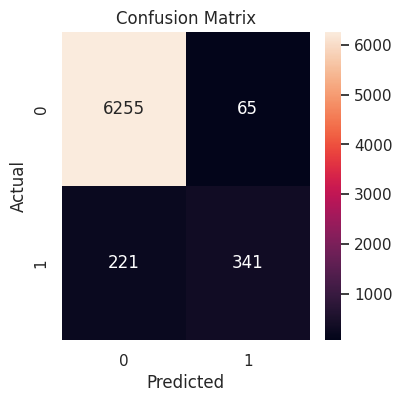

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(4, 4))
b = sns.heatmap(cf_matrix, annot=True, fmt='g')
b.set(title='Confusion Matrix')
b.set(xlabel='Predicted', ylabel='Actual')
plt.show()

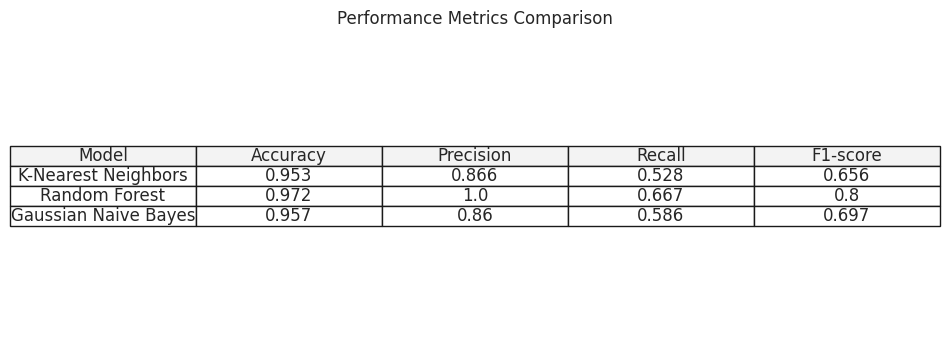

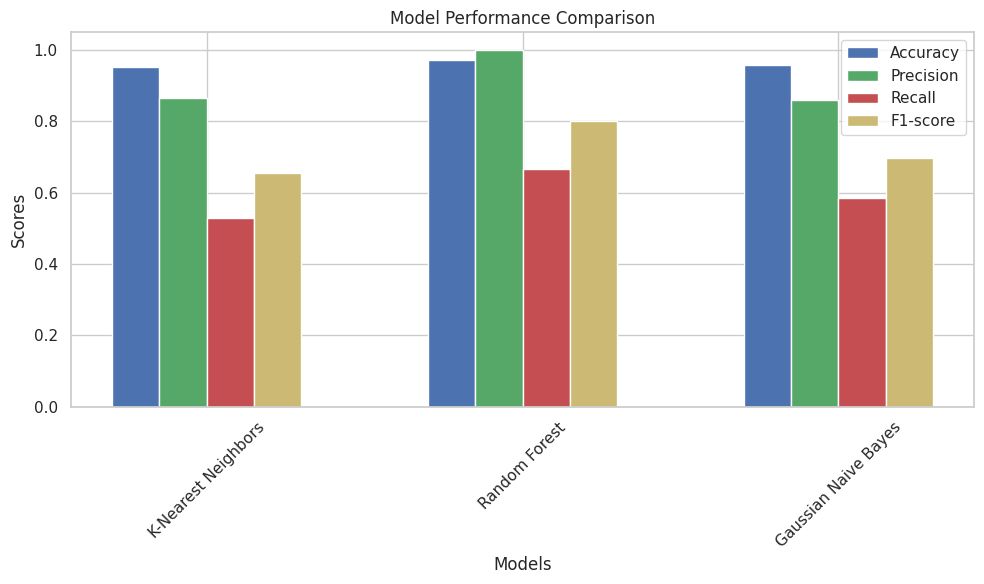

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# metrics for each model
models = ['K-Nearest Neighbors', 'Random Forest', 'Gaussian Naive Bayes']
accuracy = [0.953, 0.972,0.957 ]  # Replace with your actual accuracy scores
precision = [0.866, 1.0, 0.860]  # Replace with your actual precision scores
recall = [0.528, 0.667, 0.586]  # Replace with your actual recall scores
f1 = [0.656, 0.800, 0.697]  # Replace with your actual F1 scores

# Creating a table
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust figsize to increase the width of the table
ax.axis('tight')
ax.axis('off')

headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']
cell_text = []
for i in range(len(models)):
    cell_text.append([models[i], accuracy[i], precision[i], recall[i], f1[i]])

table = ax.table(cellText=cell_text, colLabels=headers, cellLoc='center', loc='center', colColours=['#f3f3f3']*5)
table.auto_set_font_size(False)
table.set_fontsize(12)  # Adjust font size if necessary
table.scale(1.2, 1.2)  # Adjust scaling if necessary to fit more content

plt.title('Performance Metrics Comparison')
plt.show()
# Creating a grouped bar chart
n_models = len(models)
index = np.arange(n_models)
bar_width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(index, accuracy, bar_width, label='Accuracy', color='b')
rects2 = ax.bar(index + bar_width, precision, bar_width, label='Precision', color='g')
rects3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='r')
rects4 = ax.bar(index + 3 * bar_width, f1, bar_width, label='F1-score', color='y')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models, rotation=45)  # Adjust rotation for better readability
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pickle

# Assuming best_model_rnf is already defined as your best model
file_path = r'C:\Users\admin\Desktop\New folder (3)\random_forest_model.pkl'

# Save the model to a file using pickle
with open(file_path, 'wb') as f:
    pickle.dump(best_model_rnf, f)



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\admin\\Desktop\\New folder (3)'